In [2]:
import bioc
from bioc import biocxml
import pandas as pd
from constants import train_path
import glob
import os
from collections import defaultdict
from tqdm import tqdm


In [57]:
# read training annotation data

annot_path = os.path.join(train_path, "Annotations","*")
files = glob.glob(annot_path)

data_list = []
for filename in tqdm(files):
    #collections = bioc.col
    with open(filename, 'r') as fp:
        collection = biocxml.load(fp)
        for doc in collection.documents:
            for passage in doc.passages:
                for annot in passage.annotations:
                    for loc in annot.locations:
                        data_entry = dict()
                        data_entry["doc_id"] = doc.id
                        data_entry["passage_type"] = passage.infons["type"]
                        data_entry["passage_offset"] = passage.offset
                        data_entry["annot_id"] = annot.id
                        data_entry.update(annot.infons)  
                        data_entry["sent_offset"] = loc.offset
                        data_entry["sent_length"] = loc.length
                        data_entry["text"] = annot.text
                        data_list.append(data_entry)   
dat_df = pd.DataFrame(data_list)     
dat_df.shape

100%|██████████| 100/100 [00:00<00:00, 653.74it/s]


(3086, 11)

In [58]:
dat_df["gene_eid"] = dat_df['gene'].str.extract(r'\((.*?)\)', expand=False)
dat_df["gene"] = dat_df['gene'].str.replace(r'\(.*?\)', "")
dat_df["go_id"] = dat_df['go-term'].str.extract(r'\|(.*)', expand=False)
dat_df['go-term'] = dat_df['go-term'].str.replace(r'\|(.*)', "")

dat_df.to_csv(os.path.join(train_path, "annotations.tsv"), sep = "\t", header=True, index=False)


C:\Users\jaj146\AppData\Local\Temp\ipykernel_7316\2032902347.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dat_df["gene"] = dat_df['gene'].str.replace(r'\(.*?\)', "")
C:\Users\jaj146\AppData\Local\Temp\ipykernel_7316\2032902347.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dat_df['go-term'] = dat_df['go-term'].str.replace(r'\|(.*)', "")


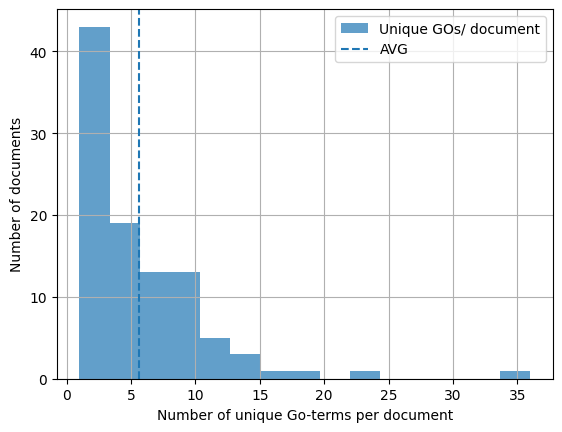

In [80]:
# plot the distribution of number of unique go terms / document
avg = dat_df.groupby(["doc_id"]).nunique().go_id.mean()
ax = (dat_df
       .groupby(["doc_id"])
       .nunique()
       .go_id
       .plot
       .hist(bins=15,logx=False, alpha = 0.7)
);

ax.set_xlabel('Number of unique Go-terms per document')
ax.set_ylabel('Number of documents')
ax.axvline(avg, linestyle='--', color='C0')
ax.legend(["Unique GOs/ document","AVG"])
ax.grid()

fig = ax.get_figure()

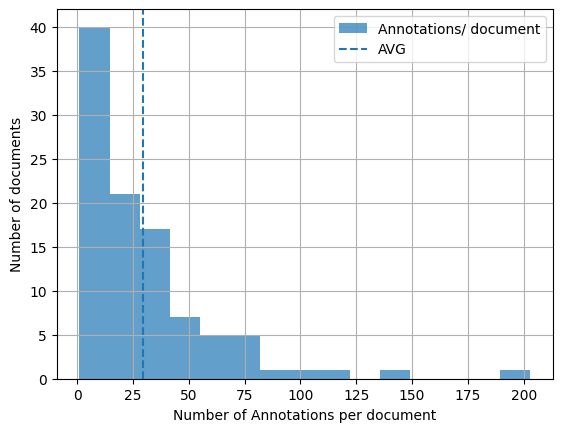

In [79]:
# plot the distribution of number of number of annotations / document
avg = dat_df.groupby(["doc_id"]).nunique().annot_id.mean()
ax = (dat_df
       .groupby(["doc_id"])
       .nunique()
       .annot_id
       .plot
       .hist(bins=15,logx=False, alpha = 0.7)
);

ax.set_xlabel('Number of Annotations per document')
ax.set_ylabel('Number of documents')
ax.axvline(avg, linestyle='--', color='C0')
ax.legend(["Annotations/ document","AVG"])
ax.grid()

fig = ax.get_figure()

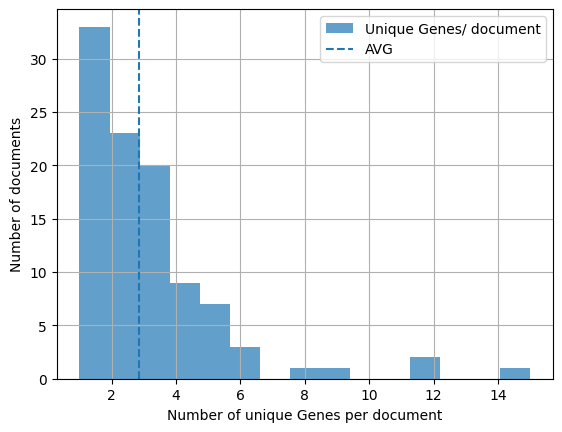

In [78]:
# plot the distribution of number of unique genes / document
avg = dat_df.groupby(["doc_id"]).nunique().gene_eid.mean()
ax = (dat_df
       .groupby(["doc_id"])
       .nunique()
       .gene_eid
       .plot
       .hist(bins=15,logx=False, alpha = 0.7)
);

ax.set_xlabel('Number of unique Genes per document')
ax.set_ylabel('Number of documents')
ax.axvline(avg, linestyle='--', color='C0')
ax.legend(["Unique Genes/ document","AVG"])
ax.grid()

fig = ax.get_figure()